# K Means Clustering of Oregon Businesses 

The dataset used in this KMeans Clustering is from County Business Patterns and has business data – NAICS codes and number of employees – by ZCTA (the Census version of ZIP code that is consistent for longitudinal analysis).

There is customer-focused piece of this (businesses) as well as presence of contractors to deliver projects based upon their NAICS codes. The data is from Bureau of Labor Statistics. In the past, the dataset in other states and was able to cross-reference business size with utility energy usage (not public data) and the correlation was strong enough to be useful to programs.

In this dataset, we want to explore the dataset and mine this for clusters of businesses by size and industry type (Using NAICS Codes).

In [6]:
#importing necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
nacis = pd.read_csv('NACIS.txt')
df = pd.DataFrame(nacis)

In [8]:
df.head()

,fipstate,naics,lfo,empflag,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,...,n500_999,f1000,e1000nf,e1000,q1000nf,q1000,a1000nf,a1000,n1000,censtate
0,1,------,-,NaN,G,1673249,G,16667378,G,68970623,...,192,NaN,G,178085,G,2332729,G,9441224,92,63
1,1,------,C,NaN,G,766685,G,8868459,G,35219759,...,121,NaN,G,89807,G,1269209,G,4863040,49,63
2,1,------,Z,NaN,G,473577,G,4150278,G,18378077,...,28,NaN,H,21835,G,195301,G,914997,13,63
3,1,------,S,NaN,G,67223,G,490235,G,2119042,...,8,I,D,0,D,0,D,0,2,63
4,1,------,P,NaN,G,180868,G,1518668,G,6433918,...,10,NaN,G,12565,H,153701,H,661490,7,63


By looking at the dataset head, we have 84 columns. The description of each column can be seen below:

FIPSTATE        C    FIPS State Code 
NAICS           C    Industry Code - 6-digit NAICS code.                     
EMPFLAG         C    Data Suppression Flag
EMP             N    Total Mid-March Employees
QP1             N    Total First Quarter Payroll ($1,000)                                                             
AP              N    Total Annual Payroll ($1,000)
EST             N    Total Number of Establishments
F1_4            C    Data Suppression Flag: - 1-4 Employee Size Class
E1_4            N    Mid-March Employees: - 1-4 Employee Size Class
Q1_4            N    First Quarter Payroll ($1,000): - 1-4 Employee Size Class
A1_4            N    Annual Payroll ($1,000): - 1-4 Employee Size Class
N1_4            N    Number of Establishments: 1-4 Employee Size Class
F5_9            C    Data Suppression Flag: 5-9 Employee Size Class
Q5_9            N    First Quarter Payroll ($1,000): - 5-9 Employee Size Class
A5_9            N    Annual Payroll ($1,000): - 5-9 Employee Size Class
N5_9            N    Number of Establishments: 5-9 Employee Size Class
F10_19          C    Data Suppression Flag: 10-19 Employee Size Class
E10_19          N    Mid-March Employees: - 10-19 Employee Size Class
Q10_19          N    First Quarter Payroll ($1,000): - 10-19 Employee Size Class
A10_19          N    Annual Payroll ($1,000): - 10-19 Employee Size Class
E5_9            N    Mid-March Employees: - 5-9 Employee Size Class
N10_19          N    Number of Establishments: 10-19 Employee Size Class
F20_49          C    Data Suppression Flag: 20-49 Employee Size Class
E20_49          N    Mid-March Employees: - 20-49 Employee Size Class
Q20_49          N    First Quarter Payroll ($1,000): - 20-49 Employee Size Class
A20_49          N    Annual Payroll ($1,000): - 20-49 Employee Size Class
N20_49          N    Number of Establishments: 20-49 Employee Size Class
F50_99          C    Data Suppression Flag: 50-99 Employee Size Class
E50_99          N    Mid-March Employees: - 50-99 Employee Size Class
Q50_99          N    First Quarter Payroll ($1,000): - 50-99 Employee Size Class
A50_99          N    Annual Payroll ($1,000): - 50-99 Employee Size Class
N50_99          N    Number of Establishments: 50-99 Employee Size Class
F100_249        C    Data Suppression Flag: 100-249 Employee Size Class
E100_249        N    Mid-March Employees: - 100-249 Employee Size Class
Q100_249        N    First Quarter Payroll ($1,000): - 100-249 Employee Size Class
A100_249        N    Annual Payroll ($1,000): - 100-249 Employee Size Class
N100_249        N    Number of Establishments: 100-249 Employee Size Class
N100_249        N    Number of Establishments: 100-249 Employee Size Class
F250_499        C    Data Suppression Flag: 250-499 Employee Size Class
E250_499        N    Mid-March Employees: - 250-499 Employee Size Class
Q250_499        N    First Quarter Payroll ($1,000): - 250-499 Employee Size Class
A250_499        N    Annual Payroll ($1,000): - 250-499 Employee Size Class
N250_499        N    Number of Establishments: 250-499 Employee Size Class
F500_999        C    Data Suppression Flag: 500-999 Employee Size Class
E500_999        N    Mid-March Employees: - 500-999 Employee Size Class
Q500_999        N    First Quarter Payroll ($1,000): - 500-999 Employee Size Class
A500_999        N    Annual Payroll ($1,000): - 500-999 Employee Size Class
N500_999        N    Number of Establishments: 500-999 Employee Size Class
F1000           C    Data Suppression Flag: - 1,000 or More Employee Size Class
E1000           N    Mid-March Employees: - 1,000 or More Employee Size Class
Q1000           N    First Quarter Payroll ($1,000): - 1,000 or More Employee Size Class
A1000           N    Annual Payroll ($1,000): - 1,000 or More Employee Size Class
N1000           N    Number of Establishments: 1,000 or More Employee Size Class
CENSTATE        C    Census State Code


In [9]:
df.columns

Index(['fipstate', 'naics', 'lfo', 'empflag', 'emp_nf', 'emp', 'qp1_nf', 'qp1',
       'ap_nf', 'ap', 'est', 'f1_4', 'e1_4nf', 'e1_4', 'q1_4nf', 'q1_4',
       'a1_4nf', 'a1_4', 'n1_4', 'f5_9', 'e5_9nf', 'e5_9', 'q5_9nf', 'q5_9',
       'a5_9nf', 'a5_9', 'n5_9', 'f10_19', 'e10_19nf', 'e10_19', 'q10_19nf',
       'q10_19', 'a10_19nf', 'a10_19', 'n10_19', 'f20_49', 'e20_49nf',
       'e20_49', 'q20_49nf', 'q20_49', 'a20_49nf', 'a20_49', 'n20_49',
       'f50_99', 'e50_99nf', 'e50_99', 'q50_99nf', 'q50_99', 'a50_99nf',
       'a50_99', 'n50_99', 'f100_249', 'e100_249nf', 'e100_249', 'q100_249nf',
       'q100_249', 'a100_249nf', 'a100_249', 'n100_249', 'f250_499',
       'e250_499nf', 'e250_499', 'q250_499nf', 'q250_499', 'a250_499nf',
       'a250_499', 'n250_499', 'f500_999', 'e500_999nf', 'e500_999',
       'q500_999nf', 'q500_999', 'a500_999nf', 'a500_999', 'n500_999', 'f1000',
       'e1000nf', 'e1000', 'q1000nf', 'q1000', 'a1000nf', 'a1000', 'n1000',
       'censtate'],
      dtype=

### Dropping unwanted columns

Since the 'ap' and 'est' columns summarize columns 'f1_4' to 'n1000', we are going to drop these columns and remain with a much cleaner dataset to work with.

In [10]:
df = df.drop(['f1_4', 'e1_4nf', 'e1_4', 'q1_4nf', 'q1_4',
       'a1_4nf', 'a1_4', 'n1_4', 'f5_9', 'e5_9nf', 'e5_9', 'q5_9nf', 'q5_9',
       'a5_9nf', 'a5_9', 'n5_9', 'f10_19', 'e10_19nf', 'e10_19', 'q10_19nf',
       'q10_19', 'a10_19nf', 'a10_19', 'n10_19', 'f20_49', 'e20_49nf',
       'e20_49', 'q20_49nf', 'q20_49', 'a20_49nf', 'a20_49', 'n20_49',
       'f50_99', 'e50_99nf', 'e50_99', 'q50_99nf', 'q50_99', 'a50_99nf',
       'a50_99', 'n50_99', 'f100_249', 'e100_249nf', 'e100_249', 'q100_249nf',
       'q100_249', 'a100_249nf', 'a100_249', 'n100_249', 'f250_499',
       'e250_499nf', 'e250_499', 'q250_499nf', 'q250_499', 'a250_499nf',
       'a250_499', 'n250_499', 'f500_999', 'e500_999nf', 'e500_999',
       'q500_999nf', 'q500_999', 'a500_999nf', 'a500_999', 'n500_999', 'f1000',
       'e1000nf', 'e1000', 'q1000nf', 'q1000', 'a1000nf', 'a1000', 'n1000'], axis = 1)

In [11]:
df.head()

,fipstate,naics,lfo,empflag,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,censtate
0,1,------,-,NaN,G,1673249,G,16667378,G,68970623,99584,63
1,1,------,C,NaN,G,766685,G,8868459,G,35219759,28682,63
2,1,------,Z,NaN,G,473577,G,4150278,G,18378077,37856,63
3,1,------,S,NaN,G,67223,G,490235,G,2119042,11465,63
4,1,------,P,NaN,G,180868,G,1518668,G,6433918,11941,63


### Selecting only the State of Oregon

The fipstate code for Oregon is 41, therefore we are going to select rows with a fipstate of 41 and thus end up with a dataset of about 9300 rows.

In [12]:
df = df.loc[325678:335142, :]

In [13]:
df.head()

,fipstate,naics,lfo,empflag,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,censtate
325678,41,------,Z,NaN,G,452979,G,4045397,G,18153655,49893,92
325679,41,------,S,NaN,G,63299,G,375031,G,1677498,15464,92
325680,41,------,P,NaN,G,172462,G,1399103,G,6051309,13869,92
325681,41,------,N,NaN,G,216844,G,2221553,G,9420010,10077,92
325682,41,------,G,NaN,H,18467,H,299952,H,1188650,23,92


In [14]:
df.dtypes

fipstate     int64
naics       object
lfo         object
empflag     object
emp_nf      object
emp          int64
qp1_nf      object
qp1          int64
ap_nf       object
ap           int64
est          int64
censtate     int64
dtype: object

### Cleaning the 'naics' column

The 'naics' column is currently an object with various data types in it. However, we want to clean it up and convert it to a float in order to be able to easily manipulate it.

In [15]:
df['naics'] = df['naics'].str.replace(r'\D', '')

In [16]:
df.head()

,fipstate,naics,lfo,empflag,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,censtate
325678,41,,Z,NaN,G,452979,G,4045397,G,18153655,49893,92
325679,41,,S,NaN,G,63299,G,375031,G,1677498,15464,92
325680,41,,P,NaN,G,172462,G,1399103,G,6051309,13869,92
325681,41,,N,NaN,G,216844,G,2221553,G,9420010,10077,92
325682,41,,G,NaN,H,18467,H,299952,H,1188650,23,92


In [17]:
#Filling up the empty rows with NaN values

df.naics = pd.to_numeric(df.naics, errors='ignore')
df.naics = pd.to_numeric(df.naics, errors='coerce')
df.naics.head()

325678   NaN
325679   NaN
325680   NaN
325681   NaN
325682   NaN
Name: naics, dtype: float64

In [18]:
#Replacing NaN values with 0

df.naics = df.naics.fillna(value='0')
df.naics.head()

325678    0
325679    0
325680    0
325681    0
325682    0
Name: naics, dtype: object

In [19]:
#Converting the 'naics' column to a float

df['naics'] = df.naics.astype(float)

In [20]:
df.naics.head()

325678    0.0
325679    0.0
325680    0.0
325681    0.0
325682    0.0
Name: naics, dtype: float64

In [21]:
df['naics'].max()

813990.0

### Implementing KMeans 

In [22]:
X = df.iloc[:, [1,10]].values
X

array([[0.0000e+00, 4.9893e+04],
       [0.0000e+00, 1.5464e+04],
       [0.0000e+00, 1.3869e+04],
       ...,
       [9.9000e+01, 1.6000e+01],
       [9.9000e+01, 3.0000e+00],
       [9.9000e+01, 2.0000e+00]])

### Creating Clusters

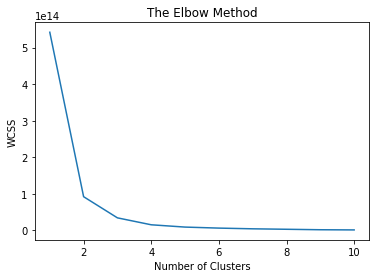

In [23]:
#Using elbow method to find optimal number of clusters 
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Applying KMeans

In [24]:
#Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [25]:
print(y_kmeans)

[1 1 1 ... 1 1 1]


### Visualizing the data

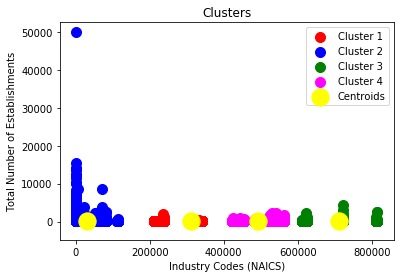

In [26]:
#Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Industry Codes (NAICS)')
plt.ylabel('Total Number of Establishments')
plt.legend()
plt.show()

In [35]:
X = df.iloc[:, [9,10]].values
X

array([[18153655,    49893],
       [ 1677498,    15464],
       [ 6051309,    13869],
       ...,
       [    1484,       16],
       [      24,        3],
       [       0,        2]])

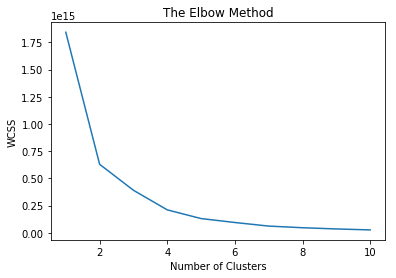

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

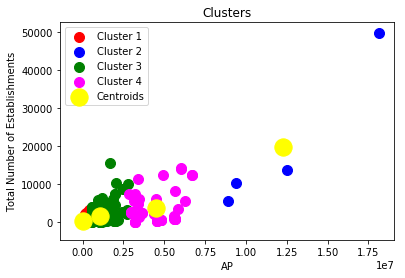

In [39]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('AP')
plt.ylabel('Total Number of Establishments')
plt.legend()
plt.show()